**강의목표**  
k최근접 이웃 회귀, 선형회귀의 차이 이해  
사이킷런으로 선형회귀 모델 생성

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

길이 50cm 농어에 대해 예측, 시각화해보자.

In [6]:
print(knr.predict([[50]])) # 예측했더니 무게가 1033으로 뜬다.

[1033.33333333]


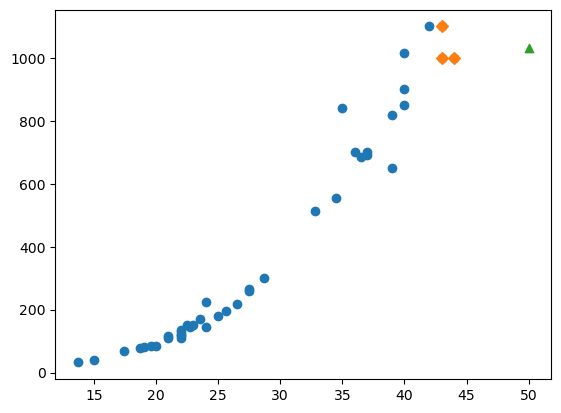

1033.3333333333333


In [9]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker = '^') # 50cm 농어 데이터
plt.show()
print(np.mean(train_target[indexes]))

100cm 농어에 대해서도 해보자.

In [10]:
print(knr.predict([[100]])) # 예측했더니 똑같이 무게가 1033으로 뜬다.

[1033.33333333]


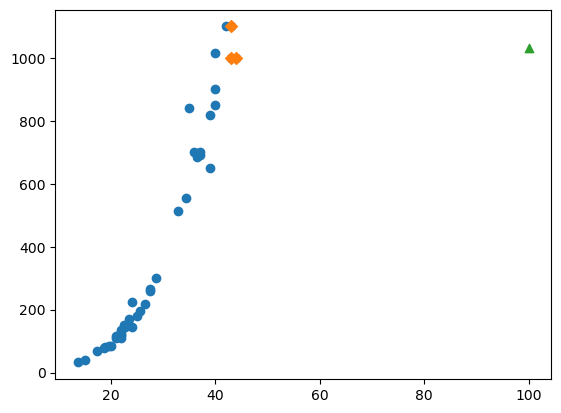

In [11]:
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker = '^')
plt.show()

알 수 있는 점은 kNN은 **길이(input)과 무게(output)의 관계를 학습하지 않고, 가까운 샘플을 이용해 예측** 한다.

#### 선형회귀

입력과 출력간 관계를 학습한다. (kNN과의 차이점)

- 입력 특성이 하나인 경우: 단순 선형회귀(simple linear Regression)  
- 단순 선형회귀는 입출력 관계를 나타낸 **이차원 평면 내 샘플** 들을 잘 설명하는 직선을 찾는다.

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]])) # kNN회귀에 비해 예측값이 높아짐.

[1241.83860323]


𝑦 = 𝑎𝑥 + b 꼴로 직선이 표현된다.  
- x: 농어의 길이(input)
- y: 농어의 무게(output)

a, b를 구하여 얻어지게 된다. == **모델 파라미터**  
(coef_, inetercept_)  

머신러닝 알고리즘의 훈련과정들은 **최적의 모델 파라미터** 를 찾는거라고 할 수 있다.


In [14]:
# 기울기(a), 절편(b) 확인 
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


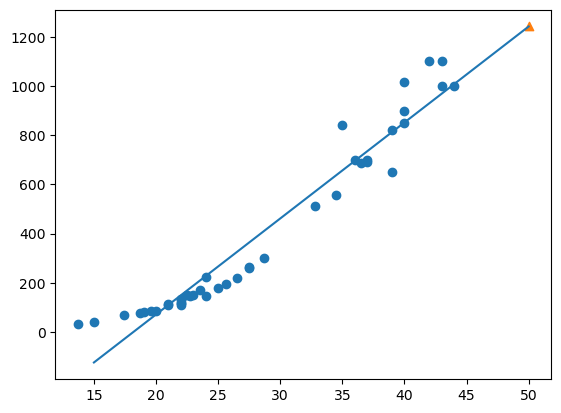

In [19]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_]) # 15~50범위의 1차방정식 그래프
plt.scatter(50, 1241.8, marker='^')
plt.show()
# 50cm농어는 훈련세트 범위 밖의 샘플이지만 직선으로 표현된 회귀모델을 이용해 무게값 예측이 가능함을 확인

In [20]:
# 회귀모델 성능 평가
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


성능이 좋지 않음 == **과소적합 시그널**

위의 plot을 보면 길이가 감소할수록 무게 감소 패턴이 더디지만 직선형태는 표현하지 못했다.  
짧은 길이에 대해서는 음수 무게값을 예측하게 되는데, 말이 되지 않는다.

**곡선형태의 모델** 학습 시도

#### 다항회귀

다항식을 사용한 선형회귀 모델이다.  
**길이 제곱항** 을 하나의 특성으로 추가해보자. (무게 = a*길이^2 + b*길이 + c)

In [22]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [27]:
print(lr.coef_, lr.intercept_) #모델 파라미터를 살펴보면 한 개가 증가한 것을 확인 가능하다.

[  1.01433211 -21.55792498] 116.05021078278264


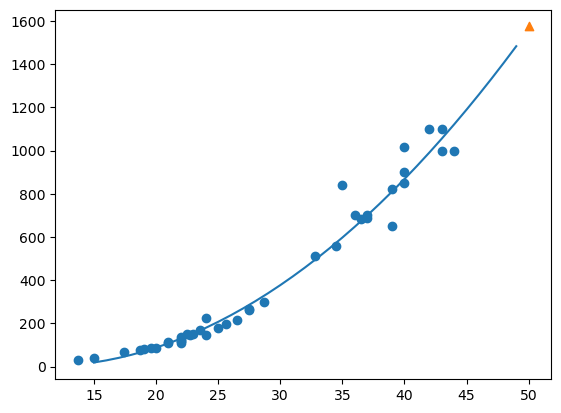

In [28]:
# 구간별 직선 그려보기
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05) # 2차 방정식 그래프

plt.scatter([50], [1574], marker='^')
plt.show()

In [29]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


여전히 과소적합 경향이 일부 있지만, 성능이 높아졌고 학습한 곡선이 데이터에 잘 부합한다. 훈련범위 밖에서도 잘 예측한다.

다항식은 곡선을 표현할 수 있어 입력 특성과 타겟 값의 **비선형관계** 를 표현한다.  
*선형* 의 의미는 **회귀계수에 대해 선형적** 이라는 의미다.  
다항 회귀의 입출력 관계가 비선형일 수 있으나 회귀계수에 대해 선형적이기 때문에 선형회귀로 분류한다.